# Random walks

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator
import numpy as np
from tqdm import tqdm

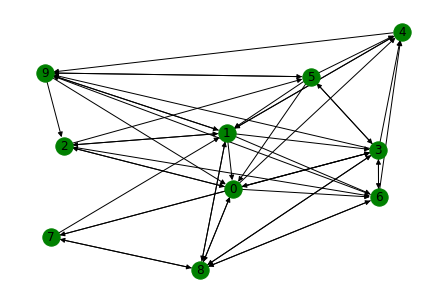

<Figure size 1080x720 with 0 Axes>

In [2]:
#select random graph using gnp_random_graph() function of networkx
Graph = nx.gnp_random_graph(10, 0.5, directed=True)
nx.draw(Graph, with_labels=True, node_color='green') #draw the network graph 
plt.figure(figsize=(15,10))
plt.show() #to show the graph by plotting it

In [3]:
# random_node is the start node selected randomly
random_node = random.choice([i for i in range(Graph.number_of_nodes())])
dict_counter = {} #initialise the value for all nodes as 0
for i in range(Graph.number_of_nodes()):
    dict_counter[i] = 0
# increment by traversing through all neighbors nodes
dict_counter[random_node] = dict_counter[random_node]+1

#Traversing through the neighbors of start node
for i in range(10000):
    list_for_nodes = list(Graph.neighbors(random_node))
    if len(list_for_nodes)==0:# if random_node having no outgoing edges
        random_node = random.choice([i for i in range(Graph.number_of_nodes())])
        dict_counter[random_node] = dict_counter[random_node]+1
        
    else:
        random_node = random.choice(list_for_nodes) #choose a node randomly from neighbors
        dict_counter[random_node] = dict_counter[random_node]+1

In [4]:
        
# using pagerank() method to provide ranks for the nodes        
rank_node = nx.pagerank(Graph)

#sorting the values of rank and random walk of respective nodes
sorted_rank = sorted(rank_node.items(), key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(), key=operator.itemgetter(1))


In [5]:
sorted_rank

[(7, 0.049212258583150245),
 (5, 0.07370537666938684),
 (2, 0.07591396972473242),
 (6, 0.09890773049319411),
 (4, 0.0992171783574147),
 (8, 0.10063067709790519),
 (3, 0.11410333978136096),
 (0, 0.12074197671109117),
 (9, 0.12427897630548267),
 (1, 0.14328851627628164)]

In [6]:
 sorted_random_walk

[(7, 391),
 (5, 695),
 (2, 740),
 (8, 947),
 (6, 993),
 (4, 1044),
 (3, 1142),
 (0, 1234),
 (9, 1305),
 (1, 1510)]

In [7]:
from scipy.stats import spearmanr
spearmanr([x[0] for x in sorted_rank], [x[0] for x in sorted_random_walk])

SpearmanrResult(correlation=0.8545454545454544, pvalue=0.0016368033159867143)

## ER graph

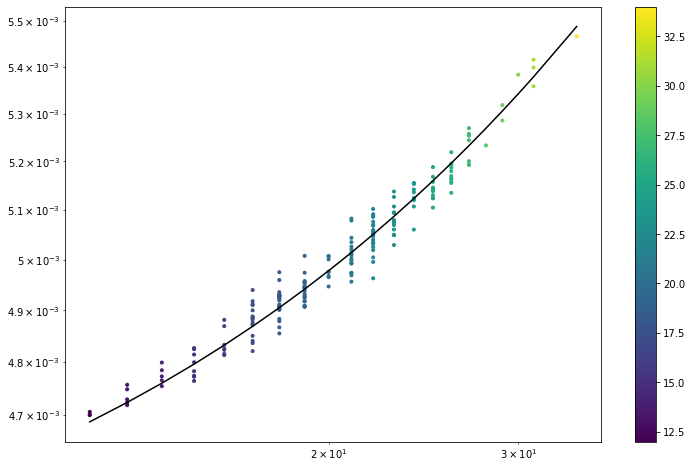

In [516]:
G = nx.DiGraph(nx.erdos_renyi_graph(200, 0.1))

q = 0.85
pr = nx.pagerank_alg.pagerank(G, alpha=1-q)

in_degrees = [G.in_degree(x) for x in pr]
out_degrees = [G.out_degree(x) for x in pr]

fig = plt.figure(figsize=(12,8))
plt.scatter(in_degrees, pr.values(), c=out_degrees, marker='.')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.plot(sorted(in_degrees), predicted_rank(sorted(in_degrees), q), 'k-')



## real world graph

In [506]:
# filepath  = "./../datasets/USairport_2010.txt"
filepath = "./../datasets/cit-HepTh.txt"
G = nx.DiGraph()
fh = open(filepath, "r")
for line in fh.readlines():
    s = line.strip().split()
    if s[0] != "#":
        origin = int(s[0])
        dest = int(s[1])
        G.add_edge(origin, dest)
fh.close()

In [507]:
GCC = G.subgraph(list(nx.weakly_connected_components(G))[0])
GCC.number_of_nodes()

27400

In [508]:

ranks = nx.pagerank(GCC, alpha=1-q)
ranks

{1001: 3.2602499246893044e-05,
 9304045: 4.071306164225111e-05,
 9308122: 6.479306620003078e-05,
 9309097: 8.698076219806325e-05,
 9311042: 4.5027491416976204e-05,
 9401139: 0.0002062551248078757,
 9404151: 5.263194784399839e-05,
 9407087: 0.000657918655059675,
 9408099: 0.000435401415075891,
 9501030: 7.183653532234046e-05,
 9503124: 0.0003809559588067761,
 9504090: 0.00013857143647131768,
 9504145: 8.315079544067203e-05,
 9505025: 4.028424998714547e-05,
 9505054: 4.735170114694794e-05,
 9505105: 0.0001002915296066482,
 9505162: 7.5393056368472e-05,
 9506048: 4.515780210886138e-05,
 9506112: 6.813057106676225e-05,
 9506144: 5.227848260853375e-05,
 9507050: 7.362582036791592e-05,
 9507158: 0.00012099234013801616,
 9508094: 4.9926041251757153e-05,
 9508155: 6.809694853171543e-05,
 9510142: 4.017626740799703e-05,
 9510225: 7.76787039787459e-05,
 9510234: 4.6642662505665174e-05,
 9511030: 0.0001161820133031774,
 9511171: 4.007831301786174e-05,
 9601108: 4.9613164206003e-05,
 9602022: 0.00

In [509]:
in_degrees = [GCC.in_degree(x) for x in ranks]
out_degrees = [GCC.out_degree(x) for x in ranks]


In [510]:
def predicted_rank(in_degrees, q=0.85):
    av = np.mean(in_degrees)
    N = len(in_degrees);
    return q/N  + ((1-q)/N) * (np.array(in_degrees)/av)

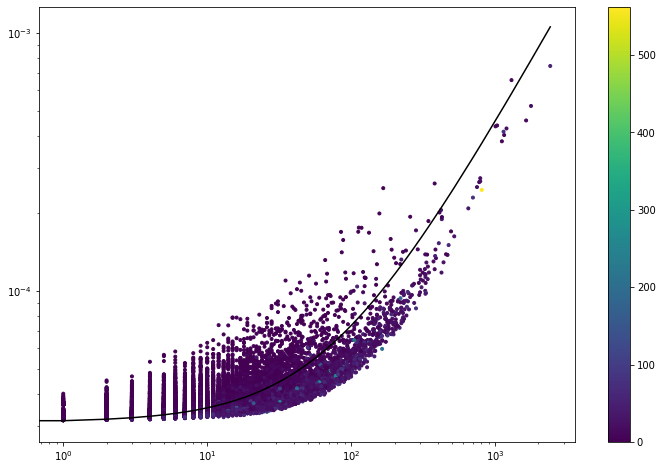

In [512]:
fig = plt.figure(figsize=(12,8))
plt.scatter(in_degrees, ranks.values(), c=out_degrees, marker='.')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.plot(sorted(in_degrees), predicted_rank(sorted(in_degrees), q), 'k-')


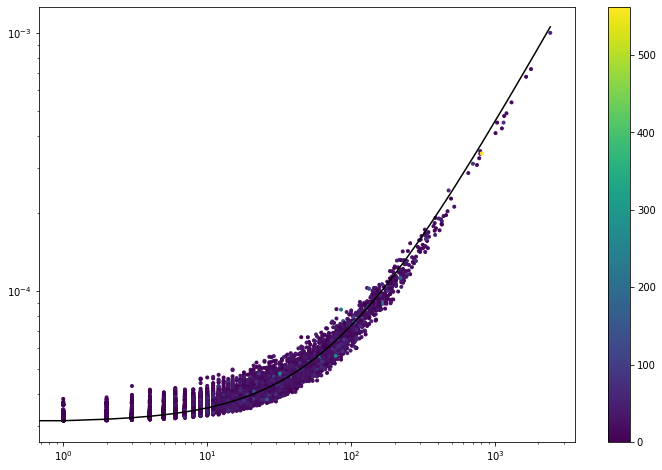

In [513]:
new_G = nx.directed_configuration_model(in_degrees, out_degrees)
cm_ranks = nx.pagerank(new_G, 1-q)

cm_in_degrees = [new_G.in_degree(x) for x in cm_ranks]
cm_out_degrees = [new_G.out_degree(x) for x in cm_ranks]
fig = plt.figure(figsize=(12,8))
plt.scatter(cm_in_degrees, cm_ranks.values(), c=cm_out_degrees, marker='.')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.plot(sorted(cm_in_degrees), predicted_rank(sorted(cm_in_degrees), q), 'k-')


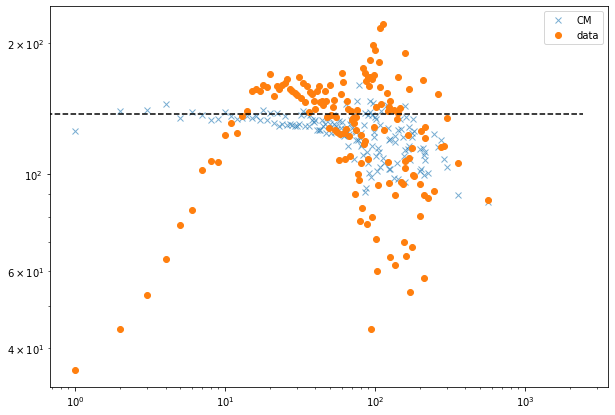

In [500]:
knn_G = nx.average_degree_connectivity(G, source='out', target='in')
knn_CM_G = nx.average_degree_connectivity(new_G, source='out', target='in')
k1, k2 = np.mean(np.array(in_degrees)), np.mean(np.array(in_degrees) ** 2)

plt.figure(figsize=(10, 7))
plt.loglog(knn_CM_G.keys(), knn_CM_G.values(), "x", alpha=0.6, label="CM")
plt.loglog(knn_G.keys(), knn_G.values(), "o", label="data")
plt.hlines(k2 / k1, np.min(in_degrees), np.max(in_degrees), colors="k", linestyles="dashed")
plt.legend()

---
---

# Explicit walks 

In [8]:
## Code imported from https://github.com/kerighan/graph-walker

# !pip install pybind11
# !pip install graph-walker

## Example of walks on ER graph

In [627]:
import networkx as nx
import walker

# create a random graph
G = nx.fast_gnp_random_graph(5000, 0.01, directed=True)

# generate random walks
X = walker.random_walks(G, n_walks=50, walk_len=25)
X

Random walks - T=0.33s


array([[   0, 4035, 2484, ..., 3682, 3286,  767],
       [   1,  654, 4823, ..., 1327, 1430,  231],
       [   2,  662, 4496, ..., 3677, 4030,  503],
       ...,
       [4997, 3051, 1446, ..., 2218, 2162, 4205],
       [4998, 2709, 4612, ..., 2530, 3309, 2835],
       [4999, 4383, 4372, ..., 3666, 2997,  335]], dtype=uint32)

In [628]:
# generate random walks with restart probability alpha
X = walker.random_walks(G, n_walks=50, walk_len=25, alpha=.1)

Random walks - T=1.31s


In [629]:
# you can generate random walks from specified starting nodes
X = walker.random_walks(G, n_walks=50, walk_len=25, start_nodes=[0, 1, 2])

Random walks - T=0.28s


In [630]:
# generate random walks according to Node2Vec methodology by specifying p and q
X = walker.random_walks(G, n_walks=50, walk_len=25, p=.25, q=.25)

Random walks - T=2.67s


In [631]:
X

array([[   0,  197,   71, ..., 1692,  528, 3447],
       [   1,  254, 4907, ..., 3725, 1702,  447],
       [   2, 1369, 3601, ..., 3281, 3332, 3270],
       ...,
       [4997,  850,  830, ..., 2792,  254, 4670],
       [4998, 3120, 2002, ...,  628, 3524, 4727],
       [4999,  257, 4119, ..., 3642, 2421, 4495]], dtype=uint32)

# Return times

### Return times on ER graph

In [632]:
def return_time(walk,verbose=False):
    starting_node = walk[0]
    return_times = [t for (t, n) in enumerate(walk) if n==starting_node] 
    if verbose==True:
        print(return_times)
    if len(return_times)>1:
        return np.diff(return_times);
    else:
        return [len(walk)];

In [633]:
print(set(dict(G.in_degree).values()))

{28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}


In [634]:
k_nodes = [n for n in G.nodes if G.in_degree(n)<40]
len(k_nodes)

324

In [635]:
walks = walker.random_walks(G, n_walks=50, walk_len=50, alpha=0, start_nodes=k_nodes)

Random walks - T=0.32s


In [636]:
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 16200/16200 [00:00<00:00, 160142.65it/s]


49.82327160493827


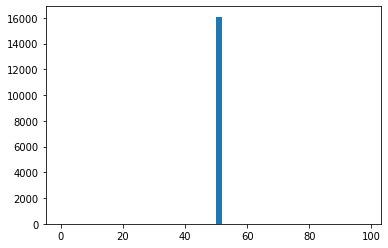

In [637]:
plt.hist(collected_returns, bins=range(0,100,2));
print(np.mean(collected_returns))

In [638]:
k_nodes = [n for n in G.nodes if G.in_degree(n)>60]
len(k_nodes)

337

In [639]:
walks = walker.random_walks(G, n_walks=50, walk_len=50, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 16850/16850 [00:00<00:00, 172138.87it/s]

Random walks - T=0.30s


49.692873672343204


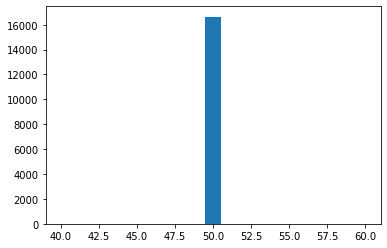

In [644]:
plt.hist(collected_returns, bins=np.linspace(40,60,20));
print(np.mean(collected_returns))

## returns times on scale-free graph

In [645]:
from scipy.stats import zipf

a = 2.5
seq = zipf.rvs(a, loc=1, size=10000)
if np.sum(seq) % 2 != 0:
    seq[0] = seq[0] + 1
    
G = nx.configuration_model(seq)

In [646]:
print(set(dict(G.degree).values()))

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 134, 38, 43, 44, 45, 51, 67, 88, 90, 100, 106, 113}


In [654]:
k_nodes = [n for n in G.nodes if G.degree(n)<4]
len(k_nodes)

8764

In [655]:
walks = walker.random_walks(G, n_walks=30, walk_len=400, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

  2%|▏         | 5402/262920 [00:00<00:09, 27094.84it/s]

Random walks - T=0.66s


100%|██████████| 262920/262920 [00:10<00:00, 26023.82it/s]


104.60263909479816


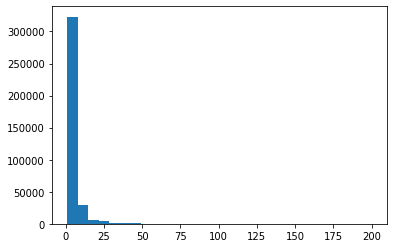

In [656]:
plt.hist(collected_returns, bins=np.linspace(1,200,30));
print(np.mean(collected_returns))

In [657]:
k_nodes = [n for n in G.nodes if G.degree(n)>80]
len(k_nodes)

6

In [658]:
walks = walker.random_walks(G, n_walks=30, walk_len=400, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

Random walks - T=0.05s


100%|██████████| 180/180 [00:00<00:00, 5200.80it/s]


77.71057884231537


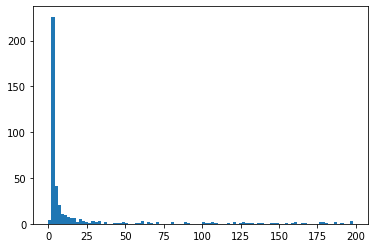

In [664]:
plt.hist(collected_returns, bins=range(0,200,2));
print(np.mean(collected_returns))

## Return times on WS graph

In [688]:
n_exp =6;
N = 10**n_exp
G = nx.watts_strogatz_graph(N, 6, 0.01)
walks = walker.random_walks(G, n_walks=20, walk_len=10000000, alpha=0, start_nodes=random.sample(list(G.nodes), 5))


/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=17.24s


In [689]:
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


305279.009832273


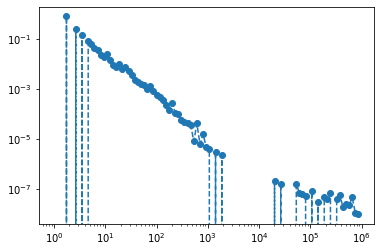

In [690]:
aa, bb = np.histogram(collected_returns, bins=np.logspace(0,6,100), density=True);
plt.loglog(bb[:-1], aa, '--o')
print(np.mean(collected_returns))

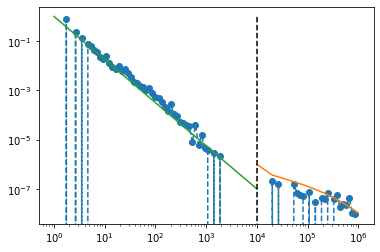

In [718]:
p = 0.01

def long_time_theory_ws(x, p, scaled=10e-7):
    return scaled*np.exp(- np.power((p**2)*(x-x[0]), 0.33));

def short_time_theory_ws(x, D, scaled=10e-1):
    return scaled*np.power(x, -D/2);

plt.plot(bb[:-1], aa, '--o')

th_bins = np.linspace(1/(p**2), 10**n_exp,100)
plt.plot(th_bins, long_time_theory_ws(th_bins, p))

th_bins = np.linspace(1, 1/(p**2), 100)
plt.plot(th_bins, short_time_theory_ws(th_bins, 3.5))


plt.yscale('log')
plt.xscale('log')
plt.vlines(1/(p**2), 0, 1, color='k', linestyle='dashed')

---
---

# Graph Coverage

In [219]:
def discovered_nodes(walk, steps = 10):
    L = []
    if isinstance(steps, int):
        bins = range(0, len(walk), steps);
    for i in steps:
        L.append(len(set(walk[:i])))
    return L;

### ER graph

In [216]:
G = nx.fast_gnp_random_graph(10000, 0.001)
walks = walker.random_walks(G, n_walks=1, walk_len=100000, alpha=0)

/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=8.60s


In [220]:
bins = np.logspace(0, 5, 15)
bins = list(map(int, bins))
covs = [discovered_nodes(walk, steps=bins) for walk in walks]

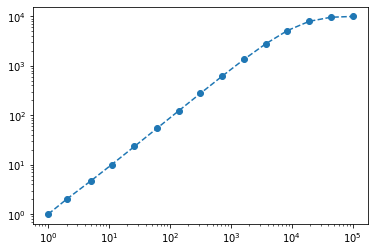

In [221]:
import pandas as pd
df = pd.DataFrame(covs)
plt.loglog(bins, df.mean(),'o--')

### WS model

  0%|          | 0/4 [00:00<?, ?it/s]/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=6.15s


 25%|██▌       | 1/4 [00:18<00:55, 18.52s/it]/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=10.60s


 50%|█████     | 2/4 [00:43<00:44, 22.29s/it]/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=6.73s


 75%|███████▌  | 3/4 [01:03<00:21, 21.25s/it]/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=17.48s


100%|██████████| 4/4 [01:42<00:00, 25.53s/it]


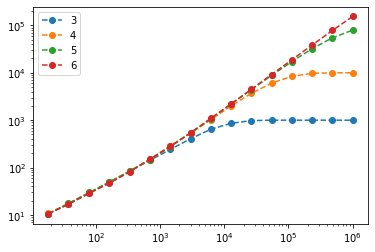

In [307]:
for n_exp in tqdm([3, 4, 5, 6]):
    N = 10**n_exp
    G = nx.watts_strogatz_graph(N, 6, 0.01)
    walks = walker.random_walks(G, n_walks=20, walk_len=10000000, alpha=0, start_nodes=random.sample(list(G.nodes), 5))
    bins = np.logspace(0, 6, 20)
    bins = list(map(int, bins))
    covs = [discovered_nodes(walk, steps=bins) for walk in walks]
    import pandas as pd
    df = pd.DataFrame(covs)
    plt.loglog(bins[4:], df.mean()[4:],'o--', label = n_exp)
plt.legend()